In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Data Processing and Analysis

In this section, we will load, analyze, and process data for polynomial regression. It's important to note that we are working with one-dimensional data.

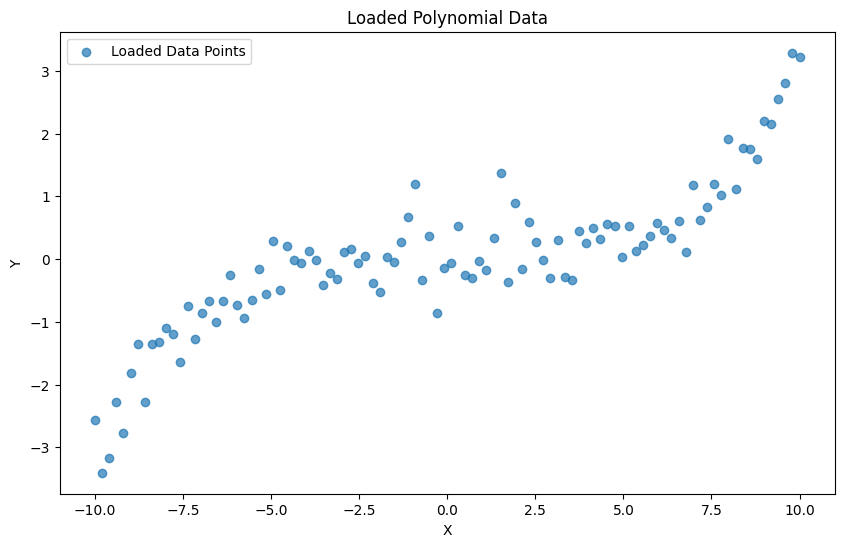

In [2]:
def load_dataset(file):

    x, y = None, None

    data = np.load(file)
    x, y = data
    y = y / 1000

    return x, y

x, y = load_dataset("data.npy")

# Plot the loaded data to verify
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Loaded Data Points", alpha=0.7)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Loaded Polynomial Data")
plt.legend()
plt.show()

In [ ]:
# Split the data into training, validation and testing sets
# Input: X - the input examples
#        y - the output labels
#        percentage_test - the percentage of data to be used for testing
#        percentage_validation - the percentage of data to be used for validation
# Output: X_train - the input examples for the training set
#         y_train - the output labels for the training set
#         X_val - the input examples for the validation set
#         y_val - the output labels for the validation set
#         X_test - the input examples for the testing set
#         y_test - the output labels for the testing set
# Hint: Don't forget to shuffle the data

def split_data(X, y, percentage_test=0.1, percentage_validation=0.1):

    X_train, y_train, X_val, y_val, X_test, y_test = None, None, None, None
    num_samples = None

    ########## Your code goes here ##########
    permutations = np.random.permutation(X.shape[0])
    n_train = int((1- percentage_test - percentage_validation) * X.shape[0])
    n_test = int(percentage_test * X.shape[0])
    n_validate = X.shape[0] - n_train - n_test
    X_shuffled = X[permutations]
    y_shuffled = y[permutations]
    X_train = X_shuffled[:n_train]
    y_train = y_shuffled[:n_train]
    X_val = X_shuffled[n_train:n_train + n_validate]
    y_val = y_shuffled[n_train:n_train + n_validate]
    X_test = X_shuffled[:n_validate]
    y_test = y_shuffled[:n_validate]

    #########################################

    return X_train, y_train, X_val, y_val, X_test, y_test


# Normalize the data
# Input: X - the input examples
#        mean - the mean of the input examples
#        std - the standard deviation of the input examples
# Output: X - the normalized input examples
def normalize(X, mean=None, std=None):
   
    ########## Your code goes here ##########
    X = (X - mean) / std
    #########################################

    return X

# Preprocess the data end to end
# Steps:
# 2. Load the data
# 3. Split the data into training, validation and testing sets
# 4. Normalize the data
# 5. Return the preprocessed data
# Input: X - the input examples
#        y - the output labels
#        percentage_test - the percentage of data to be used for testing
#        percentage_validation - the percentage of data to be used for validation
# Output: X_train - the input examples for the training set
#         y_train - the output labels for the training set
#         X_val - the input examples for the validation set
#         y_val - the output labels for the validation set
#         X_test - the input examples for the testing set
#         y_test - the output labels for the testing set

def prepocess_data(X, y, percentage_test=0.1, percentage_validation=0.1):

    X_train, y_train, X_val, y_val, X_test, y_test = None, None, None, None, None, None

    ########## Your code goes here ##########
    X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y, percentage_test, percentage_validation)
   
    #########################################

    return X_train, y_train, X_val, y_val, X_test, y_test


In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = prepocess_data(x, y)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label="Train Data Points", alpha=0.7)
plt.scatter(X_val, y_val, label="Validation Data Points", alpha=0.7)
plt.scatter(X_test, y_test, label="Test Data Points", alpha=0.7)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Data Split")
plt.legend()
plt.show()

## 2 Implementation

In this section, we will implement the hypothesis, loss function, and evaluation metric. Our implementation will be modular, allowing us to run multiple experiments to observe the impact of different hyperparameter choices, namely the regularization strength and the polynomial degree.

In [5]:
# Given a set of features X, create polynomial features up to degree
# Input: X - the input examples
#        degree - the maximum degree of the polynomial
# Output: X_poly - the polynomial features as a numpy array of shape (no_examples, degree+1)
# Hint: Use np.hstack to add columns to the matrix
#       Don't forget the bias term (x^0)
#       You may need to reshape X from a 1D array to a 2D array

def polynomial_features(X, degree):

    X_poly = None

    ############## Your code here #############

    
    #########################################

    return X_poly

# Given the data X and the weight vector w, compute the predictions
# Input: X - the input examples
#        w - the weight vector
#        degree - the maximum degree of the polynomial
# Output: y_pred - the predicted output
# Hint: Use the polynomial_features function you implemented in the previous task
#       The prediction operation is similar to the one in linear regression

def predict(X, w, degree):

    y_pred = None 

    ############## Your code here #############



    ###########################################

    return y_pred   

# Given the data X, the labels y and the weight vector w, compute the MSE loss  
# Input: X - the input examples
#        y - the output labels
#        w - the weight vector
#        regularization_strength - the regularization strength
# Output: mse - the mean squared error loss


def MSE(y_pred, y, w, regularization_strength=0):

    mse_loss = None

    ############## Your code here #############



    ###########################################

    return mse_loss

# Given the data X, the labels y, predicted values y_pred and the weight vector w, compute the gradient of the loss
# Input: X - the input examples
#        y - the output labels
#        y_pred - the predicted output
#        w - the weight vector
#        regularization_strength - the regularization strength
#        degree - the maximum degree of the polynomial
# Output: gradient - the gradient of the loss with respect to the weight vector
# Hint: Use the polynomial_features function you implemented in the previous task
#       Don't forget the regularization term in the gradient computation
#       The gradient computation is similar to the one in linear regression for vecotrized implementation
def gradient(X, y, y_pred, w, regularization_strength, degree):

    gradient = None

    ############## Your code here #############




    ###########################################

    return gradient


In [6]:
# Implement the train function, which will train a polynomial regression model
# Input: X_train - the input examples for the training set
#        y_train - the output labels for the training set
#        X_val - the input examples for the validation set
#        y_val - the output labels for the validation set
#        regularization_strength - the regularization strength
#        polynomial_degree - the maximum degree of the polynomial
#        learning_rate - the learning rate
#        iterations - the number of iterations
# Output: w - the weight vector learned
#        losses_train - the training loss at each iteration
#        mse_train - the training mse at each iteration
#        loss_val - the validation loss at each iteration
#        mse_val - the validation mse at each iteration
# Hint: Initialize the weights randomly
#       We save both losses with regularization as well as without regularization because we want to interpret the metric on the test set at the end
#       The loss and mse are calculated using the MSE function you implemented MSE will set the regularization_strength to 0

def train(X_train, y_train, X_val, y_val, regularization_strength, polynomial_degree, learning_rate, iterations):
  
    w, losses_train, mse_train, loss_val, mse_val = None, [], [], [], []

    ############## Your code here #############

   






    ###########################################

    return w, losses_train, mse_train, loss_val, mse_val

# Implement the test function, which will evaluate the polynomial regression model
# Input: X_test - the input examples for the testing set
#        y_test - the output labels for the testing set
#        w - the learned weight vector
#        degree - the maximum degree of the polynomial
# Output: y_pred - the predicted output
#         mse - the mean squared error loss

def test(X_test, y_test, w, degree):

    y_pred, mse = None, None
    
    ############## Your code here #############


    ###########################################

    return y_pred, mse

## 3 Experiments

Run the following experiments: 

polynomial rregression with degree 1, 2, 3, 7
with the following regularization strngts 0., 0.2, 1.2

In [7]:
degree = 7
regularization_strength = 0.
learning_rate = 0.001
iterations = 1000

w, losses_train, mse_train, loss_val, mse_val = train(X_train, y_train, X_val, y_val, regularization_strength, degree, learning_rate, iterations)

# predict each value from -1.5 to 1.5
X_pred_continous = np.linspace(-1.7, 1.7, 10000)
y_pred_continous = predict(X_pred_continous, w, degree)

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label="Train Data Points", alpha=0.7)
plt.scatter(X_val, y_val, label="Validation Data Points", alpha=0.7)
plt.scatter(X_pred_continous, y_pred_continous, label="Model", alpha=0.7)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Display polynomial model on train and validation data")
plt.legend()
plt.show()

# Plot the training and validation loss but only the first 100 iterations
plt.figure(figsize=(10, 6))
plt.plot(losses_train[:50], label="Train Loss")
plt.plot(loss_val[:50], label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.legend()
plt.show()


## Test your best result

When you feel confident of your model performance evaluate it on the test set. 

In [ ]:

y_pred_test, mse_test = test(X_test, y_test, w, degree)
print(f"Test MSE: {mse_test}")
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label="Train Data Points", alpha=0.7)
plt.scatter(X_val, y_val, label="Validation Data Points", alpha=0.7)
plt.scatter(X_test, y_test, label="Test Data Points", alpha=0.7)
plt.scatter(X_pred_continous, y_pred_continous, label="Model", alpha=0.7)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Display polynomial model on train, validation and test data")
plt.legend()
plt.show()
